# <font color='blue'>Métricas de avaliação de modelos de regressão</font>

In [1]:
# Versão da Linguagem Python
from platform import python_version
print('Python Version:', python_version())

# Verificando as versões dos pacotes instalados
pandasVersion = !pip show pandas
matplotlibVersion = !pip show matplotlib
sklearnVersion = !pip show scikit-learn
print('Pandas', pandasVersion[1])
print("Matplotlib", matplotlibVersion[1])
print("Sklearn", sklearnVersion[1])

Python Version: 3.9.13
Pandas Version: 2.0.2
Matplotlib Version: 3.7.1
Sklearn Version: 1.2.2


## Mean Squared Error - MSE
<details>
    <summary>
        <a class="btnfire small stroke"><em class="fas fa-chevron-circle-down"></em>&nbsp;&nbsp;Clique para mais detalhes</a>
    </summary>
    <br>
A função mean_squared_error calcula o erro quadrático médio. O erro é a diferença entre o valor real e o valor previsto pelo modelo. Sendo assim, o Mean Squared Error calcula a média dos erros elevados ao quadrado.
    
</details>

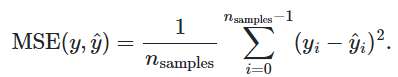

In [2]:
# Carregando imagem da equação do Mean Squared Error
from IPython.display import Image
Image('Imagens/mean_squared_error.png')

## Root Mean Squared Error - RMSE
<details>
    <summary>
        <a class="btnfire small stroke"><em class="fas fa-chevron-circle-down"></em>&nbsp;&nbsp;Clique para mais detalhes</a>
    </summary>
    <br>

A métrica Root Mean Squared Error é a raiz quadrada do erro quadrático médio, ou seja, é a raiz quadrada do Mean Squared Error. <br>
A fórmula do Root Mean Squared Error é
$\sqrt{MSE}$ <br>
A biblioteca Scikit Learn não tem uma função implementada para calcular o RMSE, mas é possível utilizar a função mean_squared_error para calcular o MSE e depois utilizar o NumPy para calcular o RMSE. <br>
    
</details>

## Mean Absolute Error - MAE
<details>
    <summary>
        <a class="btnfire small stroke"><em class="fas fa-chevron-circle-down"></em>&nbsp;&nbsp;Clique para mais detalhes</a>
    </summary>
    <br>
A função mean_absolute_error calcula o erro absoluto médio. É uma métrica correspondente ao valor do erro absoluto. Tem a mesma unidade dos dados originais.
    
</details>

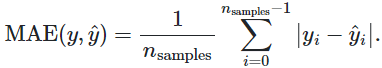

In [3]:
# Carregando imagem da equação do Mean Absolute Error
Image('Imagens/mean_absolute_error.png')

## $R^2$ - Coeficiente de determinação
<details>
    <summary>
        <a class="btnfire small stroke"><em class="fas fa-chevron-circle-down"></em>&nbsp;&nbsp;Clique para mais detalhes</a>
    </summary>
    <br>
$R^2$ é o coeficiente de determinação. Também é chamado de R score, ou R squared, ou R ao quadrado, ou simplesmente R2. <br>
Seu valor varia de 0 a 1. Sendo que, quanto mais próximo de um, melhor, e quanto mais próximo de zero pior. A escala de zero a um pode ser representada em valores percentuais. <br>
É uma métrica que avalia os acertos.<br>
O $R^2$ representa a proporção da variância de y que foi explicada pelas variáveis independentes no modelo. Ele fornece uma indicação da qualidade do ajuste, e portanto, uma medida de quão bem as amostras não vistas provavelmente serão previstas pelo modelo, por meio da proporção da variância explicada. <br>
Como essa variação depende do conjunto de dados, o $R^2$ não pode ser comparável em diferentes conjuntos de dados. Ou seja, o cientista de dados deve garantir que os datasets de treino e teste devem ser os mesmos utilizados em todos os algoritmos com os quais os dados serão treinados e testados. 
</details>

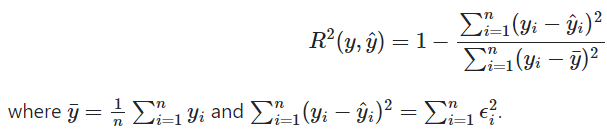

In [4]:
# Carregando imagem da equação do r2 score
Image('Imagens/r2-score.png')

In [5]:
# Carregando os pacotes
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

## Coletando os dados

In [6]:
# Coletando os dados
df = pd.read_csv('Dados/Auto-mpg/mtcars.csv')
df.head()

,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [7]:
# Visualizando informações sobre o dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   model   32 non-null     object 
 1   mpg     32 non-null     float64
 2   cyl     32 non-null     int64  
 3   disp    32 non-null     float64
 4   hp      32 non-null     int64  
 5   drat    32 non-null     float64
 6   wt      32 non-null     float64
 7   qsec    32 non-null     float64
 8   vs      32 non-null     int64  
 9   am      32 non-null     int64  
 10  gear    32 non-null     int64  
 11  carb    32 non-null     int64  
dtypes: float64(5), int64(6), object(1)
memory usage: 3.1+ KB


## Seleção de variáveis

Importância das variáveis: [0.08833013 0.25009306 0.28641223 0.01294892 0.33487642 0.01668944
 0.00197644 0.00039897 0.00441056 0.00386382]


<BarContainer object of 10 artists>

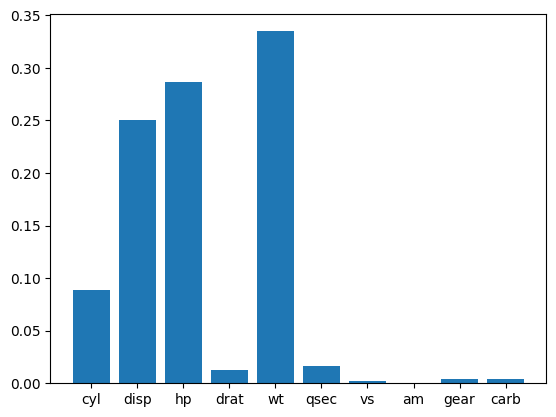

In [8]:
# Separando as variáveis preditoras e a variável alvo
numeroObservacoes = len(df)
numeroColunas = 10
X = df[["cyl","disp","hp","drat","wt","qsec","vs","am","gear","carb"]].values.reshape((numeroObservacoes, numeroColunas)) # X deve sempre ser uma matriz e nunca um vetor
y = df['mpg'].values # y pode ser um vetor

# Criando o modelo
modelo = RandomForestRegressor()

# Treinamento do modelo
modelo.fit(X, y)

# Extraindo a importância
print("Importância das variáveis: %s" %  modelo.feature_importances_)

# Gráfico com a importância das variáveis
variaveis = ["cyl","disp","hp","drat","wt","qsec","vs","am","gear","carb"]
plt.bar(variaveis, modelo.feature_importances_)

## Dividindo o dataset em dados de treino e dados de teste

In [9]:
# Separando as variáveis preditoras e a variável alvo
numeroObservacoes = len(df)
numeroVariaveisPreditoras = 4
X = df[["cyl","disp","hp","wt"]].values.reshape((numeroObservacoes, numeroVariaveisPreditoras)) # X deve sempre ser uma matriz e nunca um vetor
y = df['mpg'].values # y pode ser um vetor

# Divide os dados em treino e teste
Xtreino, Xteste, Ytreino, Yteste = train_test_split(X, y, test_size = 0.2, random_state=23)

## Criando, treinando e avaliando modelos preditivos

In [10]:
# Criando o modelo Regressão linear
modelo = LinearRegression()

# Treinando o modelo
modelo.fit(Xtreino, Ytreino)

# Fazendo previsões
previsoes = modelo.predict(Xteste)

# r2
r2 = r2_score(Yteste, previsoes)

# MSE
mse = mean_squared_error(Yteste, previsoes)

# RMSE
rmse = np.sqrt(mse)

# MAE
mae = mean_absolute_error(Yteste, previsoes)

print("R2 do modelo: %.2f" % (r2*100) + "%")
print("MSE do modelo: %.2f" % mse)
print("RMSE do modelo: %.2f" % rmse)
print("MAE do modelo: %.2f" % mae)

R2 do modelo: 82.30%
MSE do modelo: 6.12
RMSE do modelo: 2.47
MAE do modelo: 1.85


In [11]:
# Criando um dicionário
dicionario = {
    "Yteste": Yteste,
    "Valor Previsto": previsoes
}

# Criando um DataFrame
dfComparacao = pd.DataFrame(dicionario)
dfComparacao

,Yteste,Valor Previsto
0,30.4,29.827389
1,15.5,17.900719
2,17.8,19.281801
3,14.7,9.069109
4,13.3,14.482598
5,18.7,18.004886
6,26.0,26.981432


In [12]:
# Criando o modelo Árvore de Decisão
modelo = DecisionTreeRegressor(random_state = 20)

# Treinando o modelo
modelo.fit(Xtreino, Ytreino)

# Fazendo previsões
previsoes = modelo.predict(Xteste)

# r2
r2 = r2_score(Yteste, previsoes)

# MSE
mse = mean_squared_error(Yteste, previsoes)

# RMSE
rmse = np.sqrt(mse)

# MAE
mae = mean_absolute_error(Yteste, previsoes)

print("R2 do modelo: %.2f" % (r2*100) + "%")
print("MSE do modelo: %.2f" % mse)
print("RMSE do modelo: %.2f" % rmse)
print("MAE do modelo: %.2f" % mae)

R2 do modelo: 76.50%
MSE do modelo: 8.13
RMSE do modelo: 2.85
MAE do modelo: 2.44


In [13]:
# Criando um dicionário
dicionario = {
    "Yteste": Yteste,
    "Valor Previsto": previsoes
}

# Criando um DataFrame
dfComparacao = pd.DataFrame(dicionario)
dfComparacao

,Yteste,Valor Previsto
0,30.4,33.9
1,15.5,15.0
2,17.8,19.2
3,14.7,10.4
4,13.3,15.0
5,18.7,14.3
6,26.0,27.3


In [14]:
# Criando o modelo KNN
modelo = KNeighborsRegressor()

# Treinando o modelo
modelo.fit(Xtreino, Ytreino)

# Fazendo previsões
previsoes = modelo.predict(Xteste)

# r2
r2 = r2_score(Yteste, previsoes)

# MSE
mse = mean_squared_error(Yteste, previsoes)

# RMSE
rmse = np.sqrt(mse)

# MAE
mae = mean_absolute_error(Yteste, previsoes)

print("R2 do modelo: %.2f" % (r2*100) + "%")
print("MSE do modelo: %.2f" % mse)
print("RMSE do modelo: %.2f" % rmse)
print("MAE do modelo: %.2f" % mae)

R2 do modelo: 82.62%
MSE do modelo: 6.01
RMSE do modelo: 2.45
MAE do modelo: 2.30


In [15]:
# Criando um dicionário
dicionario = {
    "Yteste": Yteste,
    "Valor Previsto": previsoes
}

# Criando um DataFrame
dfComparacao = pd.DataFrame(dicionario)
dfComparacao

,Yteste,Valor Previsto
0,30.4,27.58
1,15.5,17.10
2,17.8,21.08
3,14.7,14.02
4,13.3,16.36
5,18.7,16.24
6,26.0,23.78
